# **Detecção de Outliers com Random Cut Forest (RCF)**

## Bibliotecas

In [1]:
# Libs
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

## Base de Dados

In [2]:
# Dados
df = pd.read_csv('./data/petr4_treinamento_ex.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


# Tratamento da Base de Dados

In [3]:
# Verificando Valores nulos
df.isnull().sum()

Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [4]:
# Excluído valores nulos
df = df.dropna()
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
# Selecionando a coluna "Close" para detecção de anomalias
X = df[['Close']]

## Modelo

In [6]:
# Criando e treinando o modelo
clf = IsolationForest(contamination=0.01)  # Ajuste a taxa de contaminação conforme necessário
clf.fit(X)

IsolationForest(contamination=0.01)

## Previsões

In [7]:
# Prevendo anomalias no conjunto de dados de treinamento
df['anomaly'] = clf.predict(X)
df

,Open,High,Low,Close,Adj Close,Volume,anomaly
Date,,,,,,,
2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0,1
2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0,1
2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0,1
2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0,1
2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0,1
...,...,...,...,...,...,...,...
2018-05-21,26.100000,26.290001,24.940001,25.049999,25.000000,75971900.0,-1
2018-05-22,24.809999,25.290001,24.150000,24.709999,24.709999,88109900.0,-1
2018-05-23,24.230000,24.480000,23.270000,23.270000,23.270000,74622500.0,1


## Visualização

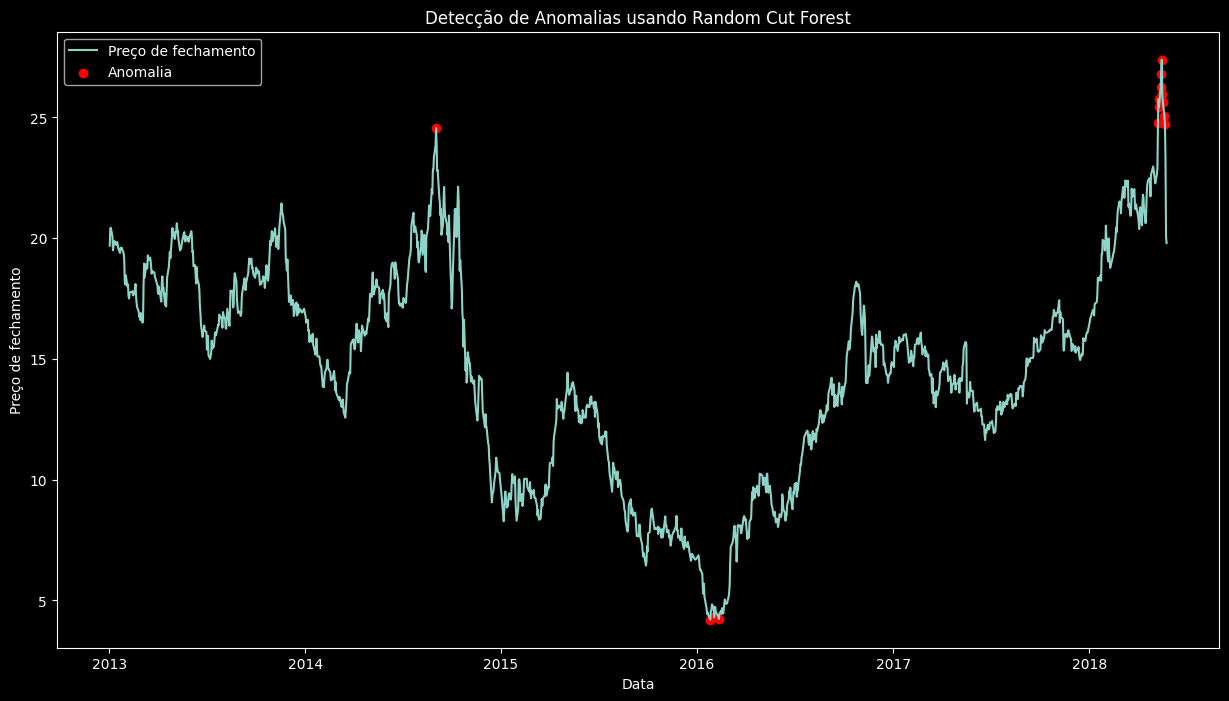

In [8]:
# Plotando os resultados
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['Close'], label='Preço de fechamento')
plt.scatter(df[df['anomaly'] == -1].index, df[df['anomaly'] == -1]['Close'], color='red', label='Anomalia')
plt.title('Detecção de Anomalias usando Random Cut Forest')
plt.xlabel('Data')
plt.ylabel('Preço de fechamento')
plt.legend()
plt.show()